<a href="https://colab.research.google.com/github/jooguilhermesc/projetos_diversos/blob/main/desafio_007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

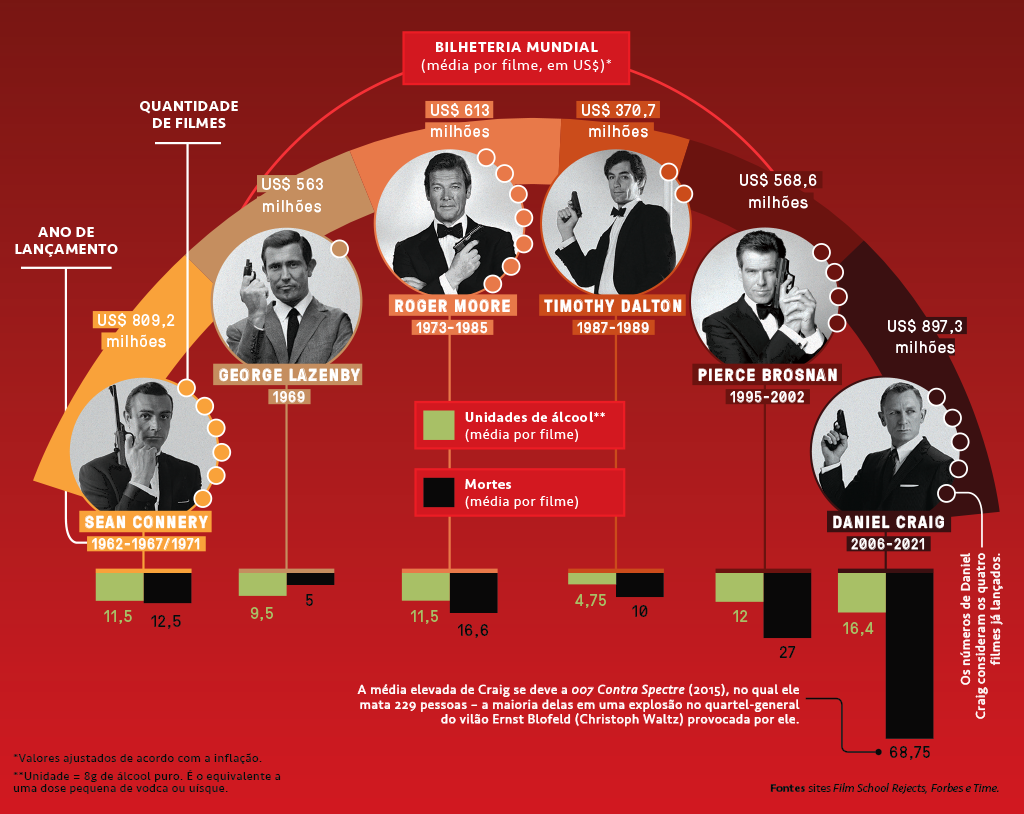

Dada a imagem acima foi pedido que fosse solucionado o seguinte desafio:

*"Considerando que o próximo filme do 007 terá 16 unidades de álcool e 25 mortes, qual o faturamento esperado? Justifique seu raciocínio e o método utilizado, apresentando também a fórmula de cálculo e suas métricas."*



Por se tratar de um problema de previsão clássico, quando é dado um conjunto de dados onde uma ou mais variáveis possuem relação com a variável alvo, optei por utilizar a regressão linear para resolver o problema. Onde as variáveis *"Unidades de Álcool"* e *"Mortes"* seriam utilizadas para encontrar uma equação linear que servisse de solução para um modelo que fosse capaz de prever qual a bilheteria da franquia de filmes, de acordo com as variáveis de entrada.

Sendo assim, para resolver o problema utilizei o algoritmo LienarRegression encontrada na biblioteca sklearn do Python, para realizar as manipulações do conjunto de dados utilizei a biblioteca pandas em combinação com a numpy. Desta maneira consegui reunir um conjunto de ferramentas que me auxiliaram na resolução deste desafio.



In [ ]:
import pandas as pd #lib para manipulação de conjuntos de dados
import numpy as np #lib para manipulação de arrays
from sklearn.linear_model import LinearRegression 
from google.colab import files #lib para importar o dataset criado para este desafio
import io

Inicialmente, criei um arquivo csv com os dados presentes no infográfico apresentado no desafio. Esse posteriormente foi upado para a nuvem afim de ser utilizado na resolução do problema.

In [ ]:
uploaded  = files.upload()
file_name = next(iter(uploaded))
file_name
gfile_name = io.StringIO(uploaded[file_name].decode('ISO 8859-1').strip())

Saving 007_data.csv to 007_data.csv


Logo após o conjunto de dados foi tratadi utilizando o pandas, afim de ser transformado em um dataframe que pudesse ser manipulado através do código python. 

In [ ]:
dataset = pd.read_csv('007_data.csv',sep=";")
dataset

,unidades de alcool,mortes,bilheteria (em milhoes de dolares)
0,11.50,12.50,809.2
1,9.50,5.00,563.0
2,11.50,16.60,613.0
3,4.75,10.00,370.7
4,12.00,27.00,568.6
5,16.40,68.75,897.3


Como variávies de entrada foram utilizadas as colunas "unidades de alcool" e "mortes", esta manipulação pode ser vista na primeira linha do código abaixo, onde um novo dataframe é gerado a partir do data frame original, descartando apenas a coluna "bilheteria (em milhoes de dolares)" utilizando a função drop() e especificando que se trata de uma coluna. Esse novo dataframe foi armazenado na variável X_model.

Em seguida, é criada a variável y_model que armazena o dataframe contendo apenas a coluna da variável alvo "bilheteria (em milhoes de dolares)", em seguida aplicando a função reshape do pacote numpy a fim de criar uma matriz de dimensão (nx1) com os elementos do dataframe gerado.

In [14]:
X_model = dataset.drop(['bilheteria (em milhoes de dolares)'],axis=1)
y_model = dataset['bilheteria (em milhoes de dolares)'].values.reshape(-1,1)

Feito isto, instanciei uma variável que armazena a função LinearRegression() e em seguida utilizei esta variável para calcular os parâmetros do modelo que neste caso foram o ponto de interceptação da reta com o eixo y e os coeficientes para as variáveis "unidades de alcool" e "mortes", estes valores foram armazenados nas suas respectivas variáveis e então foram concatenados utilizando a função print para exibir uma string contendo a equação do modelo. 

In [16]:
reg = LinearRegression()
reg.fit(X_model,y_model)
intercept = reg.intercept_[0]
coeficiente_alcool = reg.coef_[0][0]
coeficiente_mortes = reg.coef_[0][1]
print(f'O modelo é: bilheteria = {intercept:.5} + {coeficiente_alcool:.5}*alcool {coeficiente_mortes:.5}*mortes')

O modelo é: bilheteria = 130.16 + 47.893*alcool -0.7388*mortes


Por fim, utilizando o método predict e passando um array com os dados de sugeridos de 16 unidades de álcool e 25 mortes, obtive o valor estimado de US$877,97 milhões.

In [ ]:
pred = reg.predict(np.array([[16,25]]))
print(f'A previsão é de US${pred[0][0]:.5} milhões')

A previsão é de US$877.97
